# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
name = []
lat = []
lon = []
temp = []
humidity = []
cloud = []
wind = []
country = []
date = []
record = 0
set = 1
url = "http://api.openweathermap.org/data/2.5/weather?"

print('Beginning Data Retrieval')
print('-------------------------------------')

for city in cities:
    query_url = url + "appid=" + wkey + "&q=" + city + "&units=imperial"
    if record<50:
        response = requests.get(query_url).json()
        try:
            lat.append(response['coord']['lat'])
            lon.append(response['coord']['lon'])
            temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            name.append(city)
            record +=1
            print(f'Processing Record {record} of set {set} | {city}')
        except:
            print('City not found. Skipping...')
    else:
        set +=1
        record = 0
        time.sleep(15)

print('-------------------------------------')
print('Data Retrieval Complete')
print('-------------------------------------')

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of set 1 | rikitea
Processing Record 2 of set 1 | mataura
Processing Record 3 of set 1 | quelimane
Processing Record 4 of set 1 | hamilton
Processing Record 5 of set 1 | atuona
Processing Record 6 of set 1 | port alfred
Processing Record 7 of set 1 | jamestown
Processing Record 8 of set 1 | bambous virieux
Processing Record 9 of set 1 | mar del plata
Processing Record 10 of set 1 | palana
Processing Record 11 of set 1 | soe
Processing Record 12 of set 1 | tuktoyaktuk
Processing Record 13 of set 1 | san patricio
Processing Record 14 of set 1 | puerto escondido
Processing Record 15 of set 1 | inhambane
Processing Record 16 of set 1 | kodiak
City not found. Skipping...
Processing Record 17 of set 1 | albany
Processing Record 18 of set 1 | hobart
Processing Record 19 of set 1 | vila do maio
Processing Record 20 of set 1 | poum
Processing Record 21 of set 1 | busselton
Processing Record 22 of set 1 | camopi
P

City not found. Skipping...
Processing Record 36 of set 4 | lunenburg
Processing Record 37 of set 4 | talnakh
Processing Record 38 of set 4 | chicama
Processing Record 39 of set 4 | winona
Processing Record 40 of set 4 | chiang khong
Processing Record 41 of set 4 | bako
Processing Record 42 of set 4 | gwadar
Processing Record 43 of set 4 | saint-philippe
Processing Record 44 of set 4 | cabimas
Processing Record 45 of set 4 | taoudenni
Processing Record 46 of set 4 | lagos
Processing Record 47 of set 4 | suchindram
Processing Record 48 of set 4 | tura
Processing Record 49 of set 4 | derac
Processing Record 50 of set 4 | samarai
Processing Record 1 of set 5 | kavieng
Processing Record 2 of set 5 | mulege
Processing Record 3 of set 5 | alofi
Processing Record 4 of set 5 | jimma
Processing Record 5 of set 5 | eyl
Processing Record 6 of set 5 | jabinyanah
Processing Record 7 of set 5 | gizo
City not found. Skipping...
Processing Record 8 of set 5 | sibut
Processing Record 9 of set 5 | nouak

Processing Record 27 of set 8 | khash
Processing Record 28 of set 8 | jalu
Processing Record 29 of set 8 | magadan
Processing Record 30 of set 8 | myitkyina
City not found. Skipping...
Processing Record 31 of set 8 | vanderhoof
Processing Record 32 of set 8 | boone
Processing Record 33 of set 8 | doka
Processing Record 34 of set 8 | viedma
Processing Record 35 of set 8 | jingdezhen
Processing Record 36 of set 8 | kingsburg
Processing Record 37 of set 8 | krasnorechenskiy
Processing Record 38 of set 8 | victor harbor
Processing Record 39 of set 8 | santa rosa
Processing Record 40 of set 8 | poya
Processing Record 41 of set 8 | longyearbyen
Processing Record 42 of set 8 | margate
Processing Record 43 of set 8 | kalianget
Processing Record 44 of set 8 | condoto
Processing Record 45 of set 8 | rocha
Processing Record 46 of set 8 | vila velha
Processing Record 47 of set 8 | touros
Processing Record 48 of set 8 | qui nhon
Processing Record 49 of set 8 | adrar
Processing Record 50 of set 8 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
print(len(name), len(lat), len(lon), len(temp), len(humidity), len(cloud), len(wind), len(country), len(date))

549 549 549 549 549 549 549 549 549


In [5]:
weather_dict = {'City': name,
              'Latitude': lat,
              'Longitude': lon,
              'Max-Temp': temp,
              'Humidity': humidity,
              'Cloudiness': cloud,
              'Wind Speed': wind,
              'Country': country,
               'Date': date}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file, index=False)
weather_data.head()

,City,Latitude,Longitude,Max-Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,78.01,72,100,6.04,PF,1619495166
1,mataura,-46.1927,168.8643,46.00,75,91,5.01,NZ,1619495167
2,quelimane,-17.8786,36.8883,75.20,94,20,2.30,MZ,1619495167
3,hamilton,39.1834,-84.5333,63.00,48,75,9.22,US,1619495060
4,atuona,-9.8000,-139.0333,79.70,74,94,17.45,PF,1619495167


In [6]:
summary = weather_data[['Latitude', 'Longitude', 'Max-Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]
summary.describe()

,Latitude,Longitude,Max-Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,19.943172,13.449417,61.399982,70.362477,53.404372,7.392787,1.619495e+09
std,32.680107,90.643120,18.836217,22.830016,38.661318,5.152187,1.257887e+02
min,-54.800000,-175.200000,10.400000,6.000000,0.000000,0.670000,1.619495e+09
25%,-6.222200,-66.865400,46.000000,59.000000,14.000000,3.440000,1.619495e+09
50%,21.461200,16.251700,64.400000,75.000000,56.000000,5.930000,1.619495e+09
75%,46.616600,98.200000,76.330000,88.000000,91.000000,10.270000,1.619495e+09
max,78.218600,179.316700,101.750000,100.000000,100.000000,33.220000,1.619496e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
According to the code below, there are no cities in the dataset with humidity over 100%. 

In [7]:
outliers = weather_data.loc[weather_data['Humidity'] > 100]
outliers

,City,Latitude,Longitude,Max-Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

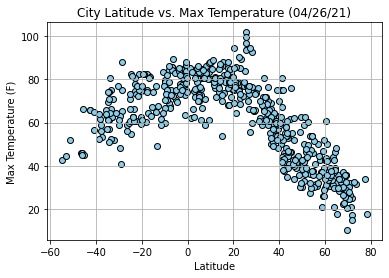

In [10]:
plt.title('City Latitude vs. Max Temperature (04/26/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.scatter(weather_data.Latitude, weather_data['Max-Temp'], color='skyblue', edgecolor='black')
plt.grid()
plt.savefig('output_data/lat_vs_temp')
plt.show()


In the scatter plot above, we can see temperature is highest around the equator (0 latitude). As we move away from the equator, either North or South, the temperature decreases.

## Latitude vs. Humidity Plot

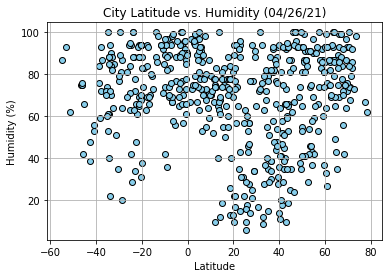

In [11]:
plt.title('City Latitude vs. Humidity (04/26/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(weather_data.Latitude, weather_data.Humidity, color='skyblue', edgecolor='black', )
plt.grid()
plt.savefig('output_data/lat_vs_humidity')
plt.show()

This scatter plot indicates humidity is not affected by latitude.

## Latitude vs. Cloudiness Plot

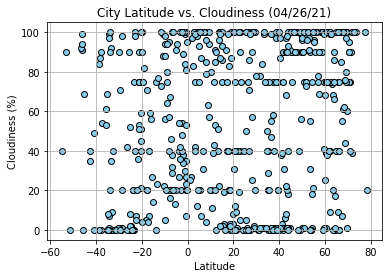

In [12]:
plt.title('City Latitude vs. Cloudiness (04/26/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(weather_data.Latitude, weather_data.Cloudiness, color='skyblue', edgecolor='black', )
plt.grid()
plt.savefig('output_data/lat_vs_cloudiness')
plt.show()

There appears to no correlation between latitude and cloudiness.

## Latitude vs. Wind Speed Plot

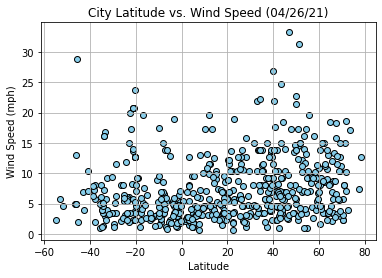

In [13]:
plt.title('City Latitude vs. Wind Speed (04/26/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(weather_data.Latitude, weather_data['Wind Speed'], color='skyblue', edgecolor='black', )
plt.grid()
plt.savefig('output_data/lat_vs_windspeed')
plt.show()

Wind speeds appear to be concentrated below 10 mph for all latitudes.

## Linear Regression

In [14]:
northern_hemisphere = weather_data.loc[weather_data['Latitude']>=0]
southern_hemisphere = weather_data.loc[weather_data['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is -0.8784568399649184.


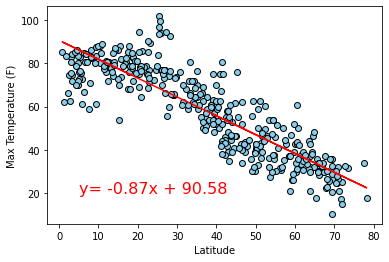

In [15]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere.Latitude, northern_hemisphere['Max-Temp'])
regress_values = northern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.scatter(northern_hemisphere.Latitude, northern_hemisphere['Max-Temp'], color='skyblue', edgecolor='black')
plt.plot(northern_hemisphere.Latitude,regress_values, color='r')
plt.annotate(line_eq, (5,20), fontsize=16, color='r')
plt.savefig('output_data/linregress_lat_vs_temp_north')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is 0.6678872109137282.


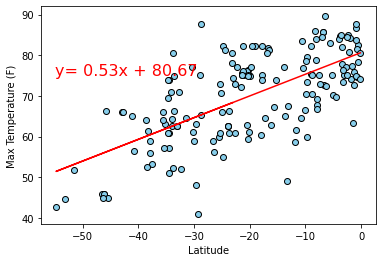

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere.Latitude, southern_hemisphere['Max-Temp'])
regress_values = southern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.scatter(southern_hemisphere.Latitude, southern_hemisphere['Max-Temp'], color='skyblue', edgecolor='black')
plt.plot(southern_hemisphere.Latitude,regress_values, color='r')
plt.annotate(line_eq, ((-55),75), fontsize=16, color='r')
plt.savefig('output_data/linregress_lat_vs_temp_south')
plt.show()

In the above two graphs we see a strong correlation between latitude and temperature, stronger in the Northern hemisphere. Both graphs depict what happens to the temperature as we move further North. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.12344328983278281.


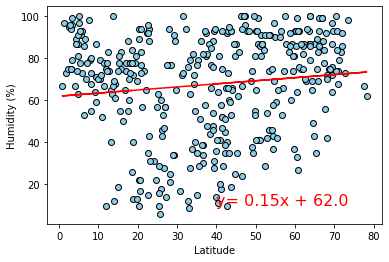

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere.Latitude, northern_hemisphere.Humidity)
regress_values = northern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(northern_hemisphere.Latitude, northern_hemisphere.Humidity, color='skyblue', edgecolor='black', )
plt.plot(northern_hemisphere.Latitude,regress_values, color='r')
plt.annotate(line_eq, (40,10), fontsize=16, color='r')
plt.savefig('output_data/linregress_lat_vs_humidity_north')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is 0.24057373192878714.


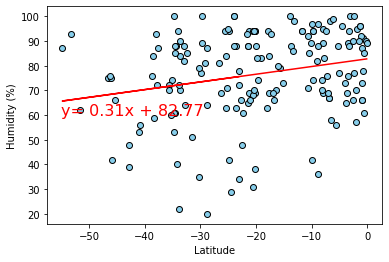

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere.Latitude, southern_hemisphere.Humidity)
regress_values = southern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(southern_hemisphere.Latitude, southern_hemisphere.Humidity, color='skyblue', edgecolor='black', )
plt.plot(southern_hemisphere.Latitude,regress_values, color='r')
plt.annotate(line_eq, (-55,60), fontsize=16, color='r')
plt.savefig('output_data/linregress_lat_vs_humidity_south')
plt.show()

The linear regressions for latitude vs. humidity confirms there is only a very small correlation between the two variables.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.09227242842819333.


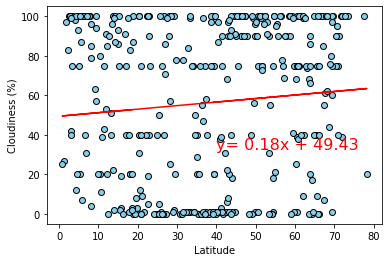

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere.Latitude, northern_hemisphere.Cloudiness)
regress_values = northern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(northern_hemisphere.Latitude, northern_hemisphere.Cloudiness, color='skyblue', edgecolor='black')
plt.plot(northern_hemisphere.Latitude, regress_values, color='r')
plt.annotate(line_eq, (40,33), fontsize=16, color='r')
plt.savefig('output_data/linregress_lat_vs_cloudiness_north')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is 0.1304812712237543.


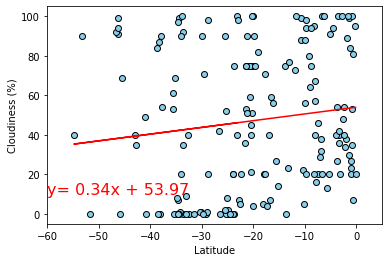

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere.Latitude, southern_hemisphere.Cloudiness)
regress_values = southern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(southern_hemisphere.Latitude, southern_hemisphere.Cloudiness, color='skyblue', edgecolor='black')
plt.plot(southern_hemisphere.Latitude,regress_values, color='r')
plt.annotate(line_eq, (-60,10), fontsize=16, color='r')
plt.xlim(-60, 5)
plt.savefig('output_data/linregress_lat_vs_cloudiness_south')
plt.show()

The linear regressions for latitude vs. cloudiness confirms there is no correlation between the two variables.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is 0.20940499971794876.


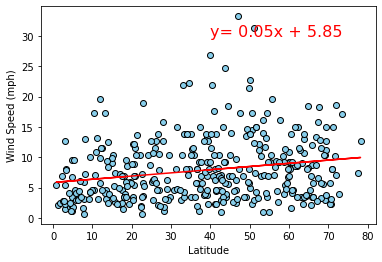

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemisphere.Latitude, northern_hemisphere['Wind Speed'])
regress_values = northern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(northern_hemisphere.Latitude, northern_hemisphere['Wind Speed'], color='skyblue', edgecolor='black')
plt.plot(northern_hemisphere.Latitude, regress_values, color='r')
plt.annotate(line_eq, (40,30), fontsize=16, color='r')
plt.savefig('output_data/linregress_lat_vs_windspeed_north')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is -0.1279962394649869.


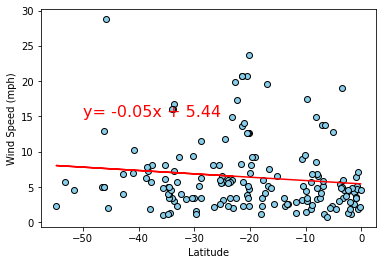

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemisphere.Latitude, southern_hemisphere['Wind Speed'])
regress_values = southern_hemisphere.Latitude * slope + intercept
line_eq = (f'y= {str(round(slope,2))}x + {str(round(intercept,2))}')

print(f'The r value is {rvalue}.')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(southern_hemisphere.Latitude, southern_hemisphere['Wind Speed'], color='skyblue', edgecolor='black')
plt.plot(southern_hemisphere.Latitude,regress_values, color='r')
plt.annotate(line_eq, (-50,15), fontsize=16, color='r')
plt.savefig('output_data/linregress_lat_vs_windspeed_south')
plt.show()

The linear regressions for latitude vs. wind speed indicates there is a small correlation between these two. As we get closer to the equator, wind speed may decrease slightly.